# 1: Decision Optimization with hyperopt

## Overview

In this lecture, we give an introduction to decision optimization 

Course objective:

- Understand how to use simulation for decision optimization

- Understand the basic idea behind the following search algorithms:

    - Grid search

    - Random search

    - Tree-structured Parzen estimator. 

- how to use hyperopt to perform search.

# Decision-making optimization

To high-light behind using simulation for decision-making optimization, let's go back to a single-server queueing system. 

Assume that we have a single-server queueing system with the following elements:

- The arrival process follows homogeneous Poisson process with ($\lambda_\text{a}$ =7)

- Service time follows t=0.2

- First come first sequence 

- Unlimited queues

- The shop opens for 8 units of time. At open for 8 hours,  the store finishes serving the current customer and turns away all the other customers. 

For a customer we finish servicing, the business gets revenue of 4. At the same time, the company also cares about customers who cannot receive the service as they might not come back in the future. The company converts the loss of customers to a loss of revenue of 2. The company wants to maximize 4s−2i between 0 and 8, where s is the number of customers served, and i is the number of customers lost.

The company is trying to look for the following options:

- Limit the capacity of queue to n. 

Converting the question to optimization question:

Objective function: 4s−2i with no constraints. 

Constraints: n=1,2,3,...

How is this optimization question different from the regular optimization problems we saw from an optimization course? s and i are both complicated functions of system input. In optimization, this is called black-box objective function. As the objective function itself is random, we need to choose a method that is suitable for the optimization in this case. 

# Optimizing decision variables

Let's first look at two simple algorithms: Grid search and Random search 

- Grid search 

    - We divide our decision variable into different segments

    - We will try out a value in each segment and compute the objective value

    - Choose the best value to optimize the objective function

- Random search 

    - Repeat the following N times

        - Randomly sample a value from the whole space and compute the objective value 

    - Choose the best value to optimize the objective function

One of the methods is called Tree-structured Parzen estimators (TPE).

TPE model is to start from random search. We sample from x from its space and compute the corresponding objective function value y. Once we get enough samples, the model will then split the outcomes using y∗ as the cutoff point.  Without losing generality, assume that we are performing a minimization problem. Then samples with values y < y∗ are all better outcomes, while sample with values y > y∗ are all worse outcomes.

Based on the outcomes, we can now construct two distributions of x based on these two sets of samples: One is the distribution constructed using the good sample values x (those leading to small y values), while the other one is the distribution constructed using the bad sample values x (those leading to large y values). More formally, let's define them as 
 
$$\begin{equation}
p(x|y) =
   \left\{\begin{array}{lr}
       l(x), & if y < y* \\
       g(x), & otherwise 
    \end{array}\right.
 \end{equation}$$

One easy way to construct these distributions is by using kernel method (for example Gaussian kernel). This can be done easily using scipy.stats.gaussian_kde() . The math behind how to find such distribution is not required. For those who are interested, please refer to this page (https://en.wikipedia.org/wiki/Kernel_density_estimation). 

It can be proved (page 4, reading) that the next sampling point should be the value that makes $l(x)/g(x)$ largest. The intuition is that the next sample should be the one that are very likely to happen in l(x) but less likely to happen at g(x). In addition, to make sure we still get the exploration going, people usually generate n samples from l distribution and choose the ones with the highest $l(x)/g(x)$ to explore. 

The following picture shows a visual comparison between grid search and random search. 

https://medium.com/criteo-engineering/hyper-parameter-optimization-algorithms-2fe447525903

# Use hyperopt for search

We can use hyperopt to perform TPE. (https://github.com/hyperopt/hyperopt/wiki/FMin)

To perform optimization, we need to define two main components:

- Objective function. 

    - This is the function that we want to minimize or maximize

    - In the previous example, our function can be defined as 

In [5]:
def objective(x):
    return -(3*x-3)**3+(x+20)**3

- use hyperopt.fmin to perform minimization

In [6]:
best = hyperopt.fmin(fn=objective,
    space=hyperopt.hp.uniform('x', -10, 10),
    algo=hyperopt.tpe.suggest,
    max_evals=100)

NameError: name 'hyperopt' is not defined

- fn gives the callable. If the task is maximization, then the objective function should return -1 times the objective value. 

- space defines the distribution of the search space 

    - Access here for a list of commonly used space options

    - For discrete uniform, use hyperopt.hp.quniform('x', lower, upper, q)

        - For example, if -20,-10,0,10, 20. Use hyperopt.hp.quniform('x', -20, 20, 10)

- algo gives the algorithm used for search. 

    - tpe.suggest uses the tree-structured Parzen estimator.

    - rand.suggest uses random search

- max_evals specifies how many evaluations should be performed. 

In [ ]:
import hyperopt 
def objective(params):
  x=params[0]
  y=params[1]
  return -1*(-(x+y+12)**3-y**4+x**3)

trials=hyperopt.Trials()
best = hyperopt.fmin(fn=objective,
    space=[hyperopt.hp.uniform('x', -10, 10),hyperopt.hp.quniform('y', -5, 5,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=300,
    trials=trials)
print(best)

100%|██████████| 300/300 [00:10<00:00, 29.18trial/s, best loss: 263.25136559835096]
{'x': -4.507111801227611, 'y': -3.0}


# multiple parameter search and Track history

In this example, we study how to maximize the following question

- $-(x+y+12)**3 - y**4 + x**3$
    - where -10 < x < 10, and y = -10, -9, -8, ..., 9, 10
    
Again, let's define our objective function

In [ ]:
def objective(params):
  x=params[0]
  y=params[1]
  return -1*(-(x+y+12)**3-y**4+x**3)

Notice two important things:

- This function can only have one argument. As a result, we pass a list of parameters. The first parameter is assigned to x, while the second parameter is assigned to y.

- Since we are performing maximization. We multiple the objective value by minus 1 to convert this question to a minimization question. 

For the minimization step, we specify

In [ ]:
best = hyperopt.fmin(fn=objective,
    space=[hyperopt.hp.uniform('x', -10, 10),hyperopt.hp.quniform('y', -5, 5,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=300)
print(best)

In [ ]:
import hyperopt 
def objective(params):
  x=params[0]
  y=params[1]
  return -1*(-(x+y+12)**3-y**4+x**3)

best = hyperopt.fmin(fn=objective,
    space=[hyperopt.hp.uniform('x', -10, 10),hyperopt.hp.quniform('y', -5, 5,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=300)
print(best)


In addition, if we want to track the optimization history, we can use hyperopt.Trials(). The modification is as follows:

In [ ]:
trials=hyperopt.Trials()

best = hyperopt.fmin(fn=objective,
    space=[hyperopt.hp.uniform('x', -10, 10),hyperopt.hp.quniform('y', -5, 5,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=300,
    trials=trials)

The trials objective is a dictionary that stores all the optimization histories.

 For example, trials.vals gives the history of x and y values. trial.results gives the minimization outcome from each step. 

In [ ]:
import hyperopt 
def objective(params):
  x=params[0]
  y=params[1]
  return -1*(-(x+y+12)**3-y**4+x**3)

trials=hyperopt.Trials()
best = hyperopt.fmin(fn=objective,
    space=[hyperopt.hp.uniform('x', -10, 10),hyperopt.hp.quniform('y', -5, 5,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=300,
    trials=trials)
 
print(trials.vals)

100%|██████████| 300/300 [00:03<00:00, 80.79trial/s, best loss: 263.5108900840554] 
{'x': [3.5935744471651105, 8.635121124209817, -7.916771691620834, -8.03184335652681, -8.601394099045551, 1.8495790911143732, 5.123260693700082, -2.1565045799806644, -9.883881344882731, 3.6636499957501716, -5.434435460356721, 7.678439867339822, -1.1237592101654315, -8.261562174787038, 6.108786149126647, 9.783276986052872, 6.1724329733580205, 8.282470238957455, -8.298733555074282, 9.084173500793597, -3.555685305788072, -4.725546450265034, -5.3084372917219005, -4.83955263717494, -5.808420092849731, -0.059399956501061446, -3.145198314211906, -6.4900174157617005, 1.2250282286175516, -4.326866676125135, -1.9428326446344633, -9.926117123987687, 0.16848931043925575, -6.944508244406338, -6.958847425061739, -3.397535531501685, 2.5339088520936794, -1.8963349334783355, -9.855028408612228, -0.36420329686606223, -4.797456440657934, -9.025659766095103, -7.432903699685925, -6.2577491451511, 3.7226105668359826, -0.96129

In [7]:
import numpy as np
import simpy
import matplotlib.pyplot as plt 
import hyperopt
%matplotlib inline

### ps. Simpy

simpy.Environment.process - 添加仿真进程

simpy.Environment.event - 创建事件

simpy.Environment.timeout - 提供延时(timeout)事件

simpy.Environment.until - 仿真结束的条件（时间或事件）

simpy.Environment.run - 仿真启动

### example 

定义一个汽车进程

def car(env):

    while True:

        print('Start parking at %d' % env.now)

        parking_duration = 5

        yield env.timeout(parking_duration) # 进程延时 5s

        print('Start driving at %d' % env.now)

        trip_duration = 2

        yield env.timeout(trip_duration)   # 延时 2s


仿真启动

env = simpy.Environment()   # 实例化环境

env.process(car(env))   # 添加汽车进程

env.run(until=15)   # 设定仿真结束条件, 这里是 15s 后停止

https://zhuanlan.zhihu.com/p/31526894


In [9]:
def arrival(env,outcomes,R1,n):
    lmbda=7
    while True: # always holds, so the process will continue indefinitely
        inter_arrival=-1/lmbda*np.log(np.random.rand()) #inter_arrival time: exponential distribution # note 10.4
        yield env.timeout(inter_arrival)
        if env.now < 8 and len(R1.queue) < n: # if the current simulation time is less than 8
            # and the length of the queue of recource R1 is less than n
            env.process(service(env,outcomes,R1)) # start a new service process
        else:
            return # end the arrival process

def service(env,outcomes,R1):
    #send a request to the server
    rqt=R1.request()
    close=env.timeout(8-env.now)
    result =yield rqt|close # | operaror retrun to the first (request to be processed, time out occur)
    #customer gets the server
    if rqt in result: # equest was successful before the close timeout
        #spend x amount of time with the server
        service=env.timeout(0.2)
        yield service
        #release the server so that the server can take care of the next customer
        R1.release(rqt)
        outcomes["served"]+=1

         
def system_sim(n):
    env=simpy.Environment()
    outcomes={"served":0}
    R1=simpy.Resource(env,capacity=1) 
    env.process(arrival(env,outcomes,R1,n))
    env.run( )
    lost=len(R1.queue) # those who have arrived but haven't been served
    return outcomes["served"]*4-lost*2

def eval_mean(n): # n represents the capacity of the queue
  return -np.mean([system_sim(n) for i in range(100)]) # negative, the lower, the less cost and fewer  lost customers

## grid search

In [ ]:
for i in range(50):
  print(i, eval_mean(i)) # use grid search to find the best n

0 -0.0
1 -13.64
2 -25.08
3 -38.96
4 -50.76
5 -62.72
6 -77.46
7 -91.68
8 -102.42
9 -110.72
10 -118.0
11 -130.92
12 -133.56
13 -134.84
14 -138.24
15 -138.56
16 -139.58
17 -136.22
18 -136.32
19 -135.58
20 -131.88
21 -132.84
22 -131.92
23 -130.6
24 -128.66
25 -128.92
26 -127.42
27 -126.26
28 -125.52
29 -124.46
30 -125.94
31 -125.42
32 -123.64
33 -125.5
34 -123.54
35 -126.98
36 -123.08
37 -124.76
38 -125.26
39 -125.72
40 -123.38
41 -124.46
42 -126.74
43 -124.28
44 -126.24
45 -123.68
46 -127.74
47 -122.9
48 -123.08
49 -127.26


## TPE/random search

In [26]:
trials=hyperopt.Trials() # store detailed information about each evaluation during the optimization process
best = hyperopt.fmin(fn=eval_mean,
    space=hyperopt.hp.quniform('n', 1, 50, 1),
    ## random search
    #algo=hyperopt.rand.suggest,
    ##tpe search 
    algo=hyperopt.tpe.suggest,
    max_evals=100,
    trials=trials)
print(best)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:17<00:00,  5.66trial/s, best loss: -142.2]
{'n': 15.0}


We could also set up an early stopping condition using

early_stop_fn=no_progress_loss(iteration_stop_count, percent_increase)

stop function that will stop after X iteration if the loss doesn't increase.

We can also set timeout= The simulation will stop after certain number of seconds

In [28]:
from hyperopt.early_stop import no_progress_loss
trials=hyperopt.Trials()
best = hyperopt.fmin(fn=eval_mean,
    space=hyperopt.hp.quniform('n', 1, 50, 1),
    ## random search
    #algo=hyperopt.rand.suggest,
    ##tpe search 
    algo=hyperopt.tpe.suggest,
    max_evals=100,
    timeout=1, # if the process will be terminated if it exceeds the 1-second timeout, stop
    trials=trials,
    early_stop_fn=no_progress_loss(iteration_stop_count=10, 
    percent_increase=0.0)) # if no improvement in the last 10 iterations, stop
print(best)

  3%|▎         | 3/100 [00:01<00:36,  2.67trial/s, best loss: -129.1]
{'n': 24.0}


In [29]:
from hyperopt.early_stop import no_progress_loss
trials=hyperopt.Trials()
best = hyperopt.fmin(fn=eval_mean,
    space=hyperopt.hp.quniform('n', 1, 50, 1),
    ## random search
    #algo=hyperopt.rand.suggest,
    ##tpe search 
    algo=hyperopt.tpe.suggest,
    max_evals=100,
    timeout=1,
    trials=trials)
print(best)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

  5%|▌         | 5/100 [00:01<00:21,  4.40trial/s, best loss: -132.1]
{'n': 12.0}


# Additional help from variance reduction

Having a smart search sequence can help us reduce the amount of time to run the simulation. However, at the same, notice that we each decision variable values, we need to run the system multiple times to estimate the population mean.  

Due to the randomness in the system, each outcome variable will follow a specific distribution. In many cases, we are interested in knowing the population mean of each distribution. Simulation allows us to directly draw random samples from this distribution. Based on these samples, we can use sample mean to approximate the population mean. We could even construct a confidence interval using these samples to help us construct the confidence interval. 

The question is how can we ensure that our sample mean is close enough to the population mean? To answer this question, remember that the sample mean varies due to the randomness of sampling. Based on the central limit theorem, when the sample size is large enough (that is, if we run the simulation for many rounds and collect the system output multiple times), the variance of sample mean can be approximated using $\sigma^2/n$ . This suggests two pathways to ensure that our sample mean has a smaller variation and be close to population mean:

- Increase n. 
    - We simply need to simulate the system for more rounds
    - However, this means that we need to run the system for much longer time 
- Reduce $\sigma^2$
    - The idea is to reduce $\sigma^2$ in order to reduce $\sigma^2/n$. The idea is to sample from a different population distribution with the same population mean but a smaller variance.   
- Changing n and $\sigma^2$ at the same time
    - We could even find a method that changes both n and $\sigma^2$ to reduce $\sigma^2/n$ without changing the mean.  As long as we have a method can reduce $\sigma^2/n$ without increasing much computation time, we achieve our goal.  

If we are planning to sample mnumber of sample outcomes y from a different distribution G instead of n number of sample outcomes x from the original distribution F in order to increase our efficiency. We need to make sure  
- Whether (E(x)=E(y)) holds. In other words, both distributions should have the same population mean.
- Wether Var(y) < Var(x)
- In addition, to achieve this variance reduction, we should not be increasing our computation time much. 

# Illustrating of two methods

Let's assume that we are interested in using sample mean to estimate the population mean of a variable X that follows an exponential distribution with $\lambda$ = 4.  We want the variation of the sample means to be small, as this means when collecting a set of samples, the sample mean as a better chance of being close to the population mean. 

One method is to generate more samples. 

Method 1:  let's compare the distribution of sample mean when size=40 versus size=200.

It is clear that the variance of the sample mean is much smaller when the sample size increases. 

One obvious drawback is that we are satisficing the time, as we need to draw more samples.  Can we find an alternative method?

Method 2:  Change $\lambda$ while maintaining μ.

Let's assume that an expert told you to try out a normal distribution of mean=0.25 and variance=0.01. You decide to give it a shot and sample 40 from normal distribution instead. let's compare the distribution of sample mean when sampling from our original exponential distribution versus the normal distribution proposed by the other person. In both cases, we use sample size=40 when computing the sample mean. 

Again, we are able to reduce the variation of the sample mean when sampling from the normal distribution. One can also check the running time to make sure that we are not increasing the running time by too much. Based on the Python demo, we can see that the running time of sampling from a normal distribution is slightly longer but not by much. np.random functions are constructed very efficiently.

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

Let's assume that we are interested in constructing use sample mean to estimate the population mean of an exponential distribution with $\lambda=4$.

Let's use [`np.random.exponential(scale, size=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) to get the job done. 
Here, `scale` should be equal to $\frac{1}{\lambda}$

Method 1: Increase sample size 

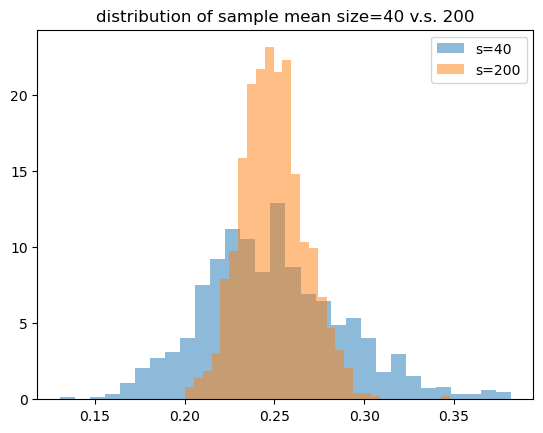

In [31]:
def simulation_exp(n):
    lm=4
    samples=np.random.exponential(1/lm,n)
    return np.mean(samples)

exp_means_40=[simulation_exp(40) for i in range(1000)]
exp_means_200=[simulation_exp(200) for i in range(1000)]

plt.hist(np.array(exp_means_40),bins=30,density=True,label="s=40",alpha=0.5)
plt.hist(np.array(exp_means_200),bins=30,density=True,label="s=200",alpha=0.5)
plt.legend()
plt.title("distribution of sample mean size=40 v.s. 200")
plt.show()

Method 2: sample from a different distribution 

Let's assume that another person told you that a normal distribution of mean=0.25 and variance=0.01 can be a good candidate. You decide to give it a shot and sample 40 from normal distribution instead. 

Let's use [`np.random.normal(loc=0.0, scale=1.0, size=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to get the job done. 

Here, `loc` is the population mean, while `scale` is the population standard deviation.

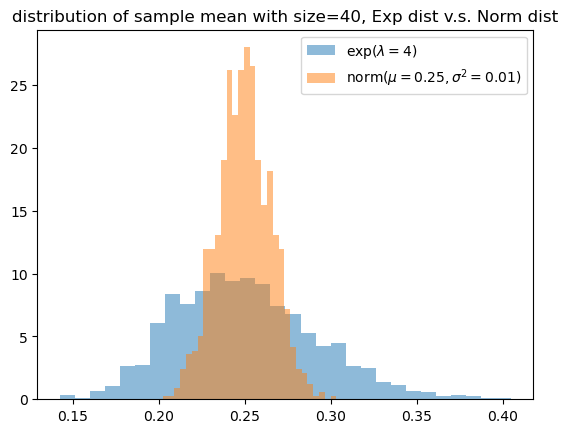

In [32]:
def simulation_exp(n):
    lm=4
    samples=np.random.exponential(1/lm,n)
    return np.mean(samples)

def simulation_norm(n):
     
    samples=np.random.normal(0.25, 0.01**0.5,n)
    return np.mean(samples)

exp_means_exp=[simulation_exp(40) for i in range(1000)]
exp_means_norm=[simulation_norm(40) for i in range(1000)]

plt.hist(np.array(exp_means_exp),bins=30,density=True,label=r"exp$(\lambda=4)$",alpha=0.5)
plt.hist(np.array(exp_means_norm),bins=30,density=True,label=r"norm$(\mu=0.25, \sigma^2=0.01)$",alpha=0.5)
plt.legend()
plt.title("distribution of sample mean with size=40, Exp dist v.s. Norm dist")
plt.show()

In [33]:
%%timeit 
exp_means_exp=[simulation_exp(40) for i in range(1000)]

12 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%%timeit
exp_means_norm=[simulation_norm(40) for i in range(1000)]

10.4 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## in class example

In [35]:
import hyperopt
import numpy as np
import simpy

from scipy.stats import uniform, poisson, expon

In [36]:
n_layer = 5 # mutilayer server

lambdas = np.array([1, 2, 1, 2, 1, 2])

def arrivals(env, servers, revenue):
    N_t = poisson.rvs(100 * lambdas[0]) # total number of arrivals
    arrival_times = uniform.rvs(size=N_t) * 100 # uniformly distributed arrival times over 100-unit time period
    arrival_times = np.sort(np.insert(arrival_times, 0, 0)) # insert 0 at the begining
    dt = arrival_times[1:] - arrival_times[:-1] # calculate for the each inter-arrival times
    service_times = expon.rvs(size=(N_t, n_layer), scale=1 / lambdas[1:])
    for i in range(0, len(dt)): # iterates through each arrival
        yield env.timeout(dt[i])
        env.process(service(env, servers, revenue, service_times[i,:]))


def service(env, servers, revenue, st):
    for i in range(0, len(st)):
        rqt = servers[i].request()
        yield rqt
        yield env.timeout(st[i])
        servers[i].release(rqt)
        revenue.append(1)


def simulate(n):
    revenue = []
    env = simpy.Environment()
    servers = [simpy.Resource(capacity=n[i], env=env) for i in range(0, n_layer)] # n_layer servers
    env.process(arrivals(env, servers, revenue))
    env.run(until=100)
    return np.sum(revenue) - n[0] * 2 - n[1] * 1 - n[2] * 2 - n[3]* 0.5 - n[4] * 1.5 # every layer server has different revenue

def run_simulations(n):
    np.random.seed(42)
    X = [simulate(n) for i in range(100)]
    return (-1) * np.mean(X)

hyperopt.fmin(fn=run_simulations,
    space=[hyperopt.hp.quniform('n1', 1, 10, 1),
           hyperopt.hp.quniform('n2', 1, 10, 1),
           hyperopt.hp.quniform('n3', 1, 10, 1),
           hyperopt.hp.quniform('n4', 1, 10, 1),
           hyperopt.hp.quniform('n5', 1, 10, 1),
           ],
    algo=hyperopt.tpe.suggest,
    max_evals=50)

100%|██████████| 50/50 [00:49<00:00,  1.01trial/s, best loss: -474.69]


{'n1': 3.0, 'n2': 2.0, 'n3': 2.0, 'n4': 5.0, 'n5': 4.0}

# 2. Antithetic Method

## Overview
In this lecture, we study how to use anti-thetic method for variance reduction. 

Learning objective:

Understand how antithetical method and control variates can be applied

## Antithetic method
Antithetic  method can be used to find a distribution that has the same mean but with a much smaller variance comparing to the distribution of our original system output. 

For the regular method, we generate n independent samples of random variable X to get x1,x2,x3,...,xn. We then use $\sum \limits _{i=1} ^ {n} X_{i}$ estimate the populate mean.

Antithetic method proposes that us to find variable X that satisfies

- E(X') = E(X)
- Var(X') = Var(X)
- Cov(X',X) < 0

We can generate ​$n/2$ independent samples of $Y=(X'+X)/2$ to get y1,y2,...,yn/2. We then use $2/n\sum \limits _{i=1} ^ {n/2} y_{i}$ estimate the populate mean. 

We can use convolution to get the sampling done
- generate $x_1,x_2,...,x_{n/2}$
- generate $x_1',x_2',...,x_{n/2}'$
- compute $y_1 = (x_1 + x_1')/2, (x_2 + x_2')/2,...,(x_{n/2} + x_{n/2}')/2$

## Constructing X'

If X = h(U1,U2,U3,...), where U1,U2,U3,... all follow a uniform distribution between 0 and 1, then X' = h(1-U1,1-U2,1-U3,...) might be such a candidate.

To see why this is the case, we need to check our assumptions

- U1,U2,U3,...all follow a uniform distribution. 1-U1,1-U2,1-U3,...will follow a uniform distribution between 0 and 1 as well. As a result, X and X′ both follow the same distribution, which gives us E(X) and E(X') and Var(X) = Var(X')

- $Cov(U_i,1-U_i) = E(U_i*(1-U_i)) - E(U_i)E(1-U_i) = E(U_i) - E(U_i)^2 - E(U_i)E(1-U_i) = 0.5 -Var(U_i) - E(U_i)^2 - 0.25 = -Var(U_i) = -1/12 $
    - We used property that $Var(x) = E(x^2) - E(x)^2$

Since all the inputs are negatively correlated, it is very likely the output X and 
X′ are negatively correlated as well. This is especially true if h is a monotone (either increasing or decreasing) function with each of its coordinates.  Based on our discussion above, we can use the following step to perform antithetic variance reduction. Thus, we can 
- sample $u_1,u_2,...u_{n/2}$ to generate samples of X
- sample $u_1',u_2',...u_{n/2}'$ to generate samples of X'
- compute $y_i=(x_i+x_i')/2$
- sample $y_1,y_2,...y_{n/2}$ to generate samples of X

Example 1:    
Estimating the mean of an exponential distribution.  Notice that u and X shared a monotonic relationship. 

In this demo, we use s^2/n to estimate the variance of the sample mean. Here, s^2 is the sample variance, while n is the number of samples.

In [3]:
import numpy as np

#sample size 100
size1=100
lmbda=1
x=-1/lmbda*np.log(np.random.rand(size1)) # exponential random variables
sm_var=np.var(x,ddof=1)/(size1)
sm=np.mean(x)
print(sm,sm_var)


#sample size 50
size2=int(size1/2)
u=np.random.rand(size2)
x_original=-1/lmbda*np.log(u)
x_anti=-1/lmbda*np.log(1-u)
y=(x_original+x_anti)/2

sm_var1=np.var(y,ddof=1)/(size2)
sm1=np.mean(y)
print(sm1,sm_var1)

0.8628211766369721 0.008832428634632856
0.9237412894101782 0.0016305204179539636


Case 2
When X is generated from a normal distribution N(μ,σ^2), 2μ−x will be from the same normal distribution and negatively correlated with x. 

Samples from a normal distribution are also converted from u. If we cannot recover u in this case, we could use the fact that if x is converted from u, then 2μ−x is converted from 1−u.

Thus, we can use x and 2μ−x as pairs.

In [ ]:
import numpy as np

size1=100
x=np.random.normal(5,1,size1)
sm_var=np.var(x,ddof=1)/(size1)
sm=np.mean(x)
print(sm,sm_var)

size2=50
x_original=np.random.normal(5,1,size2)
x_anti=10-x_original
y=(x_original+x_anti)/2
sm_var1=np.var(y,ddof=1)/(size2)
sm1=np.mean(y)
print(sm1,sm_var1)

Extension
Using scipy to help find the original part and antithetic part.

For the common distributions that have been programmed in scipy.stats , we can use the following two steps to find the antithetic part:

use u=np.random.rand() to a random number

use ppf(u) and ppf(1-u) function to find out the corresponding x and x′ sample 

For example,  the following method can generate samples for original and antithetic of Poisson samples. 

In [1]:
import numpy as np
import scipy.stats as spst

##original method 
lmbda=20
size1=100
x=np.random.poisson(lmbda,size1)
sm_var=np.var(x,ddof=1)/(size1)
sm=np.mean(x)
print(sm,sm_var)

##antithetic method 
lmbda=20
size2=int(size1/2)
u=np.random.rand(size2)
x_original=spst.poisson.ppf(u,lmbda)
x_anti=spst.poisson.ppf(1-u,lmbda)

y=(x_original+x_anti)/2
sm_var1=np.var(y,ddof=1)/(size2)
sm1=np.mean(y)
print(sm1,sm_var1)
print(x_original,x_anti)

20.18 0.14674343434343431
20.0 0.0016326530612244896
[19. 22. 23. 22. 17. 15. 33. 16. 18. 19. 17. 27. 18. 19. 15. 15. 17. 29.
 20. 20. 23. 22. 17. 16. 13. 21. 20. 19. 22. 20. 20. 17. 15. 12. 18. 17.
 22. 16. 21. 24. 16. 16. 20. 28. 19. 24. 17. 30. 17. 20.] [20. 18. 17. 18. 22. 25.  9. 24. 22. 21. 23. 13. 22. 21. 25. 25. 23. 12.
 20. 19. 17. 18. 22. 24. 27. 19. 20. 20. 18. 19. 19. 23. 26. 29. 22. 23.
 18. 24. 19. 16. 24. 24. 20. 13. 21. 16. 23. 11. 23. 20.]


## Applying antithetic method to system simulation
the basic single queueing system, we have two sets of samples to feed into the system

- (1) the inter-arrival time for each customer

- (2) the service time for each customer

Let's assume that we are interested in measuring the average time consumers spend in the system. We call this our system output.

To make sure that anti-thetic method is applied, we need to make sure that 

- In each round of the simulation, we need to make sure that the inter-arrival times and the service time as still generated from the same distribution. This makes sure that our system output is still generated from the same distribution

- We need to make sure that if one round of simulation gives a large system output, we need to make sure that the next round will, in general, give us a smaller system output. Vice versa. 

If the samples are generated using the inverse transform method or from a normal distribution, it will be very easy to generate the original parts and the anti-thetic parts using the technique we discussed in class. We need to think about whether feeding the original part and the anti-thetic part will lead to a negative correlation in the actual system output.

(1) larger inter-arrival time v.s. smaller inter-arrival time

Having larger inter-arrival time means consumers in this round of simulation are arrival at a lower frequency. In this case, we might be expecting fewer people to line up, which will lead to a lower average time in the system. 

If the inter-arrival times fed into the system are generally large, we should expect the antithetic part to be generally small. Thus, we will be able to produce negatively correlated system outputs.

(2) larger service time v.s. smaller service time

Larger service time has two impacts

- a. More people might line up. Thus, consumers might wait for a longer time before getting the service

- b. The actual service time is part of the time in the system for a consumer. Longer service time will directly contribute to a longer time in the system.

Thus, having when service time for two rounds of simulating being negatively correlated can also help to generate negatively correlated system output.

## Algorithm:
- If we want to apply anti-thetic method to system input 1 and 2 among all the inputs, then we need to repeat the following multiple times

    - Generate R1, R2 random states

    - Copy R1, R2 random states to get R1c, R2c 

    - Use R1, R2 to generate the random numbers used for the original round of simulation, which produces output x original

    - Use R1c, R2c to generate the random numbers used for the original round of simulation, which produces output x anti
​
    - compute the average of the two y = (x original +x anti)/2
​
- construct the sample mean and confidence interval using all the y's collected

In [4]:
import numpy as np
import simpy

from scipy.stats import expon

In [18]:
dt1 = expon.rvs(scale=scale)
dt1

array([0.53524935, 0.03341483])

In [19]:
dt = expon.ppf(1 - expon.cdf(dt1, scale=scale), scale=scale)
dt

array([0.88073845, 3.41541622])

In [5]:
## antithetic samples

lmbda_1 = 1.
lmbda_2 = 1.

def arrivals(env, server, T, anti):
    scale = np.power([lmbda_1, lmbda_2],-1) # 倒数
    for i in range(0, 100):
        dt = expon.rvs(scale=scale) # expon: intterarrival in poisson process
        if anti == True:
            dt = expon.ppf(1 - expon.cdf(dt, scale=scale), scale=scale)
            # dt
            # expon.cdf(dt, scale=scale): the probability that less than or equal to dt
            # 1 - expon.cdf(dt, scale=scale): complement of cdf -> prob that greater than dt
            # expon.ppf(1 - expon.cdf(dt, scale=scale), scale=scale): the value that cdf equal to the complement
            # -> the opposite of the original dt
        yield env.timeout(dt[0])
        env.process(service(env, server, dt, T))

def service(env, server, dt, T):
    t0 = env.now
    rqt = server.request()
    yield rqt
    yield env.timeout(dt[1])
    server.release(rqt)
    t1 = env.now
    T.append(t1 - t0)
    

def simulate(anti):
    T = []
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=1)
    env.process(arrivals(env, server, T, anti))
    env.run()
    return np.mean(T)

def eval_mean(n, seed):
    np.random.seed(seed)
    T_1 = [simulate(False) for i in range(0, n)]
    np.random.seed(seed)
    T_2 = [simulate(True) for i in range(0, n)]
    T_1 = np.array(T_1)
    T_2 = np.array(T_2)
    T_means = (T_1 + T_2) / 2
    return np.mean(T_means)

In [6]:
eval_mean(100, 42)

7.879790550213511

# 3. Common Random Numbers

## Overview
In this lecture, we discuss how to use the common random number method to reduce variance when we need to compare differen policies.

Learning objective:

- Understand how and when common random numbers strategy can be used. 

## Common random number algorithm
Common random number algorithm is a commonly used variance reduction technique when comparing different policies. 

Let's assume that we have configuration 1 and 2 (for example one server v.s. two servers). On ith round of simulation, each configuration generates its respective system output sample of X1i and X2i respectively. We are interested in comparing different difference between the system outputs due to two different configurations. Thus, we compute run each configuration N rounds independently to get 

If we can find a way to introduce a positive correlation between x 1i and x 2i, then we achieve variance reduction.

Answer: common random numbers might do the trick. 

Reason: if two settings have the same system input (determined by u), then under two different settings the outcomes might both tend to tilt towards the same direction.

For example, we might be interested in comparing the difference in the average time in the system under one-server and two-server. When we use the same set of service times and the arrival times for both simulations, the system output might tilt toward the same direction. For example, if ithe iteration gives very large inter-arrival times and short service times, no matter whether we use one server or two servers, the average time in the system will both be very low, thus a positive correlation.

Notice that common random numbers might not always induce positive correlations. If negative correlations are induced, we will see a variance increase. 

Example: Assume that Y1 = log(X) and Y2 = log(X+1), where X~Exp(0.2). Estimate E(Y1) - E(Y2)

In [20]:
import numpy as np 

#no common random number
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y1=np.log(X)
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y2=np.log(X+1)
print(np.mean(Y1)-np.mean(Y2),np.std(Y1-Y2,ddof=1)/1000**0.5)


##with common random variable
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y1=np.log(X)
Y2=np.log(X+1) # y1, y2 positive correlated
print(np.mean(Y1)-np.mean(Y2),np.std(Y1-Y2,ddof=1)/1000**0.5)

-0.5130305690679271 0.04793979114309394
-0.49752800712812295 0.01957605746717936


Example:  Assume that Y1 = log(X) and Y2 = -log(X+1), where X~Exp(0.2). Estimate E(Y1) - E(Y2). In this example, Y1 and Y2 are negatively correlated if we use common random number

In [21]:
import numpy as np 

#no common random number
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y1=np.log(X)
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y2=-np.log(X+1)
print(np.mean(Y1)-np.mean(Y2),np.std(Y1-Y2,ddof=1)/1000**0.5)


##with common random variable
##this one is bad because using common random numbers 
#produced a negative correlation
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y1=np.log(X)
Y2=-np.log(X+1)
print(np.mean(Y1)-np.mean(Y2),np.std(Y1-Y2,ddof=1)/1000**0.5)

2.5203170223220233 0.04589849017860493
2.534726289599544 0.062378017490919986


Solution?

In [22]:
import numpy as np 

#no common random number
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y1=np.log(X)
U=np.random.rand(1000)
lm=0.2
X=-1/lm*np.log(U)
Y2=-np.log(X+1)
print(np.mean(Y1)-np.mean(Y2),np.std(Y1-Y2,ddof=1)/1000**0.5)

##with common random variable
U=np.random.rand(1000)
lm=0.2
X1=-1/lm*np.log(U)
X2=-1/lm*np.log(1-U) # x1, x2 negative correlated
Y1=np.log(X1)
Y2=-np.log(X2+1) # y1, y2 positive correlated
print(np.mean(Y1)-np.mean(Y2),np.std(Y1-Y2,ddof=1)/1000**0.5)

2.5930015101530657 0.04709807031871637
2.553255743549584 0.017181483567398726


In [23]:
import hyperopt
import numpy as np
import simpy

from scipy.stats import expon

In [24]:
## without variance reduction

lmbda = [20, 10, 30, 10]

def arrivals(env, servers,T):
    while True:
        dt = expon.rvs(scale=1/lmbda[0])
        if env.now + dt > 1:
            break
        yield env.timeout(dt)
        env.process(service(env, servers, T))

        
def service(env,servers, T): # 依次经过三个处理器
    t0 = env.now
    for i, server in enumerate(servers):
        rqt = server.request()
        yield rqt
        dt = expon.rvs(scale=1/lmbda[i+1])
        yield env.timeout(dt)
        server.release(rqt)
    t1 = env.now
    T.append(t1-t0)

def simulate(n1, n2):
    T = []
    env = simpy.Environment()
    servers = [simpy.Resource(env, capacity=n1),
               simpy.Resource(env, capacity=n2),
               simpy.Resource(env, capacity=20 - n2 - n1)]
    env.process(arrivals(env, servers, T))
    env.run()
    return np.mean(T)

def eval_mean(n):
    n1 = n[0]
    n2 = n[1]
    X = [simulate(n1,n2) for i in range(0, 100)]
    return np.mean(X)

In [29]:
best = hyperopt.fmin(fn=eval_mean,
    space=[hyperopt.hp.quniform('n1', 1, 9, 1),hyperopt.hp.quniform('n2', 1, 9,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=50)
print(best)

100%|██████████| 50/50 [00:17<00:00,  2.90trial/s, best loss: 0.22936534918010282]
{'n1': 7.0, 'n2': 5.0}


In [25]:
X = [[eval_mean([i,j]) for i in range(2,10)] for j in range(2,10)]
X

[[0.3395208142060733,
  0.25515099181120454,
  0.2416810506323877,
  0.23647641188947519,
  0.23509093674528408,
  0.2304365022197428,
  0.23799314706813468,
  0.23462491866914992],
 [0.34520937027027004,
  0.2495212622603207,
  0.23864117919251754,
  0.23069516517298794,
  0.2346818052667881,
  0.2342372560480877,
  0.24287807644188167,
  0.2329225688120939],
 [0.32797403690143795,
  0.25314089389722194,
  0.23970179732418123,
  0.23511319790496,
  0.2359678846192341,
  0.22918641421198896,
  0.23040274650759585,
  0.2351246129661397],
 [0.3624007789818875,
  0.2552977311309171,
  0.2396646287421201,
  0.23334170089162087,
  0.23020641892766686,
  0.2411415678341837,
  0.23503480086696324,
  0.22987722834262617],
 [0.33288627511910207,
  0.24926286076338525,
  0.235558111242966,
  0.23318988050508796,
  0.2303333954142138,
  0.2353086852278555,
  0.23456762171026527,
  0.238408376057428],
 [0.32443035349079863,
  0.2544005119682958,
  0.2356406941735088,
  0.22578308832473115,
  0.232

In [26]:
## with common random numbers

lmbda = [20., 10., 30., 10.]

def arrivals(env, servers,T):
    i = 0
    while True:
        dt = expon.rvs(scale=np.power(lmbda,-1)) # 一次性生成随机数，所以在每个server里用到的都是这一组
        if env.now + dt[0] > 1:
            break
        yield env.timeout(dt[0])
        env.process(service(env, servers, T, dt, i))
        i = i + 1

        
def service(env,servers, T, dt, i):
    t0 = env.now
    for j, server in enumerate(servers):
        rqt = server.request()
        yield rqt
        yield env.timeout(dt[j+1])
        server.release(rqt)
    t1 = env.now
    T.append(t1-t0)

def simulate(n1, n2):
    T = []
    env = simpy.Environment()
    servers = [simpy.Resource(env, capacity=n1),
               simpy.Resource(env, capacity=n2),
               simpy.Resource(env, capacity=(20 - n2 - n1))]
    env.process(arrivals(env, servers, T))
    env.run()
    return np.mean(T)

def eval_mean(n):
    np.random.seed(42)
    n1 = n[0]
    n2 = n[1]
    X = [simulate(n1, n2) for i in range(0, 100)]
    return np.mean(X)

In [27]:
best = hyperopt.fmin(fn=eval_mean,
    space=[hyperopt.hp.quniform('n1', 1, 9, 1),hyperopt.hp.quniform('n2', 1, 9,1)],
    algo=hyperopt.tpe.suggest,
    max_evals=25)
print(best)

100%|██████████| 25/25 [00:07<00:00,  3.16trial/s, best loss: 0.22935072235676948]
{'n1': 8.0, 'n2': 4.0}


In [28]:
X = [[eval_mean([i,j]) for i in range(2,9)] for j in range(2,9)]
X

[[0.3360132492314921,
  0.25447533697451874,
  0.23632519330049384,
  0.23288108108178193,
  0.2324145820939136,
  0.2322144442779959,
  0.23221473738464232],
 [0.3340772072468707,
  0.25202932048415805,
  0.23390436651070823,
  0.23036630254999468,
  0.22976537043935086,
  0.22956808701052542,
  0.229538952878036],
 [0.3339256916283854,
  0.25183542192638453,
  0.23370431981029202,
  0.23017484971307925,
  0.2295501787731977,
  0.22936886763417325,
  0.22935072235676948],
 [0.33391193894574045,
  0.25182580834807244,
  0.23369197243751486,
  0.23016141606781917,
  0.229536191195917,
  0.22936534918010282,
  0.22937031491100787],
 [0.33391193894574045,
  0.25182580834807244,
  0.23369197243751486,
  0.23016425474923763,
  0.22954764173849831,
  0.22939911987006828,
  0.2294984377783414],
 [0.33391193894574045,
  0.25182580834807244,
  0.2336948111189333,
  0.23017570529181897,
  0.22957756172715624,
  0.2295272427374018,
  0.23032410482117194],
 [0.33391193894574045,
  0.25182580834807

# 4. Control Variate

## Overview
In this lecture, we study how to use variance reduction to improve the efficiency of the simulation.

Course objective:

- Understand when variance reduction technique should be used

- Understand how antithetical method and control variates can be applied

# Control variate method

Again, our task is to reduce Var(X).

Suppose we can easily generate a variable Z that with a known mean μz and correlated with X. 

Can we use Z to help us achieve variance reduction?

Thus, there are three key points we are looking for:

1. Z is easy to generate 

2. E(Z) has a closed-form solution

3. Z and X are correlated.

Algorithm:
- Step 1: Generate a set of x samples and also a set of z samples.

- Step 2: estimate $c=-cov(x,z)/var(z)$ based on the samples we have

- Step 3: Generate y samples using x+c(z−μz)

- Step 4: Construct the confidence interval using the y samples

Extension: 

- In practice, it is very likely that we do not know Cov(x,z). One possible solution is to estimate this correlation based on the simulation results. This c might make the Var(Y) slightly larger. However, we should still gain from the efficiency. 

- Remember, μ should use the theoretical mean, not the sample mean

## Applying control variates method to system simulation
Again,  Let's assume that we are still interested in constructing the confidence interval for the system output for the same system we studied before.

How do we find the variables that are correlated with the average time?

Many options:

Average inter-arrival time: This should be negatively correlated with the system output. The expected value should be equal to 1/10. Also, this value can be easily computed.

Average service time: This should be positively correlated with the system output. The expected value should be equal to 1/11. Also, this value can be easily computed.

## Including several control variates

In [3]:
import numpy as np
import simpy

from scipy.stats import expon

In [8]:
## control variates

lmbda_1 = 1.
lmbda_2 = 1.

def arrivals(env, server, T, IT, ST):
    scale = np.power([lmbda_1, lmbda_2],-1)
    for i in range(0, 100):
        dt = expon.rvs(scale=scale)
        IT.append(dt[0])
        ST.append(dt[1])
        yield env.timeout(dt[0])
        env.process(service(env, server, dt, T))

def service(env, server, dt, T):
    t0 = env.now
    rqt = server.request()
    yield rqt
    yield env.timeout(dt[1])
    server.release(rqt)
    t1 = env.now
    T.append(t1 - t0)
    
def simulate():
    T = []
    IT = []
    ST = []
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=1)
    env.process(arrivals(env, server, T, IT, ST))
    env.run()
    return np.mean(T), np.mean(IT), np.mean(ST)

def eval_mean(n):
    T_means = np.zeros(n)
    IT_means = np.zeros(n)
    ST_means = np.zeros(n)
    for i in range(0, n):
        t, it, st = simulate()
        T_means[i] = t
        IT_means[i] = it
        ST_means[i] = st
    c1 = -np.cov(T_means, IT_means)[0][1] / np.var(IT_means)
    c2 = -np.cov(T_means, ST_means)[0][1] / np.var(ST_means)
    T_tilde = T_means + c1 * (IT_means - 1 / lmbda_1) + c2 * (ST_means - 1 / lmbda_2)
    return np.mean(T_tilde)

eval_mean(100)

7.991927811598808

# 5. Variance Reduction by Conditioning

## An insurance example

Suppose an insurance company has a very large number of policies, and the probability of a policy making a claim in a given year is small. Then the number of claims in that year will be approximately Poisson distributed. Let's further suppose that the size of each claim is an independent and identically distributed positive random variable.

Then the size of the total claims in a given year can be thought as: $\sum \limits _{j=1} ^ {N} X_{j}$  where X∼g where g is some arbitrary positive distribution, and N∼Poisson(λ) where λ is the expected number of claims. This is called a mixed Poisson distribution. Depending on what g is, calculating the closed form solution for this will be hard.

We can sample from S_i according to the following procedure:

(1) Generate Ni
​

(2) Generate Xi,1 ,...,Xi,Ni, and take Si to be the sum of those.

Suppose we want to estimate $p_c=P(S>c)$. If c is large, this will presumably be a quite small; however, being able to accurately estimate it might be important (for the insurance company's capital requirements, etc).

We might naively calculate this probability using $f(S)=1(S>C)$, and using $theta = 1/n \sum \limits _{i=1} ^ {n} f(S_i)$

However, this will have variance $p_c(1-p_c)/n$ which will potentially be quite largely relative to the true value of p_c; our percentage error will likely be quite large.

Let's consider the following alternative approach:

(1) We generate  $X_i,j$ until $\sum \limits _{j=1}^{} kX_i,j > c$

(2) Let Mi = min $ until $\sum \limits _{j=1}^{} kX_i,j > c$

(3) Repeat this procedure for i = 1,..., n

Further more, we can note  $\sum \limits _{j=1}^{N} X_j > c$ only if $N>=M$, hence: $E[f(S)|M=m] = P(N>=m)$ which 1 = F_lambda(m-1) whre F_lambda is the corresponding poisson cdf.

Actually, we can improve this even more, by adding a control variate:

Let $Y_i=\sum \limits _{j=1}^{N} (X_i,j - \mu)$; it can be shown that this has expectation zero. Moreover, it will have a large magnitude of correlation with M: if M is large, then the X_i's should have been small, and vice versa.

In [1]:
import numpy as np

from scipy.stats import poisson, expon

# naive


lmbda = 10
mu = 10
c = 300

def sample_S(n):
    S= np.zeros(n)
    N = poisson.rvs(lmbda, size=n)
    for i in range(0, n):
        X = expon.rvs(scale=mu, size=N[i])
        S[i] = np.sum(X)
    return S

n = 1_000

S = sample_S(n)
f = (S > c).astype(int)
print(np.mean(f))
print(np.std(f)/np.sqrt(n))

def sample_M(n):
    M = np.zeros(n)
    for i in range(0, n):
        S_tmp = 0
        j = 0
        while S_tmp <= c:
            S_tmp += expon.rvs(scale=mu) 
            j = j + 1
        M[i] = j
    return M

def E_F_M(M):
    return 1 - poisson.cdf(M-1, lmbda)

M = sample_M(n)
efm = E_F_M(M)

print(np.mean(efm))
print(np.std(efm)/np.sqrt(n))

0.001
0.000999499874937461
0.000323238200240464
0.0001162288467788396


## A queueing example

Suppose we want to estimate the total time in system of the first n customers in a queuing system.

Suppose Wi is the time in system for the ith customer.

Then θ=E[∑Wi]. 

Suppose Si is the state of the system when customer i arrives.

Then: $\sum \limits _{i=1} ^ {n} E[W_I|S_i]$ will be an unbiased estimator θ with less variance (assuming we can calculate $E[W_I|S_i]$ explicitly).

Let's look at the more specific example of a single-server system with exp(λ) service times. Then Si = Ni - the number of people in the system when person i arrives. Then, $E[W_I|S_i] = (1+N_i)/\lambda$

 since the Ni people in front of person i need to be service in addition to person i.

In [2]:
import numpy as np
import simpy

from scipy.stats import expon

## naive way

lmbda_1 = 4.
lmbda_2 = 5.

np.random.seed(42)
def arrivals(env, server, T):
    for i in range(0, 10):
        dt = expon.rvs(scale=np.power([lmbda_1, lmbda_2],-1))
        yield env.timeout(dt[0])
        env.process(service(env, server, dt, T))

def service(env, server, dt, T):
    t0 = env.now
    rqt = server.request()
    yield rqt
    yield env.timeout(dt[1])
    server.release(rqt)
    t1 = env.now
    T.append(t1 - t0)
    

def simulate():
    T = []
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=1)
    env.process(arrivals(env, server, T))
    env.run()
    return np.mean(T)

n = 100
T = [simulate() for i in range(0, n)]
print(np.mean(T))
print(np.std(T)/np.sqrt(n))

## with variance reduction

lmbda_1 = 4.
lmbda_2 = 5.

np.random.seed(42)
def arrivals(env, server, N):
    for i in range(0, 10):
        dt = expon.rvs(scale=np.power([lmbda_1, lmbda_2],-1))
        yield env.timeout(dt[0])
        N.append(len(server.queue) + server.count)
        env.process(service(env, server, dt))

def service(env, server, dt):
    rqt = server.request()
    yield rqt
    yield env.timeout(dt[1])
    server.release(rqt)
    

def simulate():
    N = []
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=1)
    env.process(arrivals(env, server, N))
    env.run()
    N = np.array(N)
    E_W = (N + 1) / lmbda_2
    return np.mean(E_W)

n = 100
T = [simulate() for i in range(0, n)]
print(np.mean(T))
print(np.std(T)/np.sqrt(n))

0.45496097166730887
0.030965919817678416
0.4482
0.017611575738700952


# 6: Stratification

Note: suppose we want to calculate a confidence interval for our estimate of θ; we can estimate the variance of the estimator E as follows:

1. Let $S_i^2$ be the sample variance for the samples of X∣Y=yi
2. $\sigma^2 = 1/n \sum p_iS_i^2$ is an unbiased estimator for the variance of E

Another reasonable question might be - if I have the choice between using Y and a control variate or as a stratifying variable, what is the better choice? It can, in fact, be shown that the stratified estimator will always lead to a greater (or at least equal to) variance reduction when compared to the control variate estimator for the same variable. There is a proof in the textbook.

In [1]:
import numpy as np
from scipy.stats import uniform

n = 1000

def h(x):
    return x**2

j = np.arange(0, n)

U_j = (1 / n) * (uniform.rvs(size=n) + j)

theta_hat = np.mean(h(U_j))

## Stratification for Queueing Systems
A focus in this course has been analyzing the outputs of discrete event simulations. These are often driven by an arrival process which has a known discrete distribution (for the number of arrivals by the end of the simulation N(T)). This would, of course, be a good candidate for the stratifying variable Y, as we have methods of generating arrivals time conditional on the number of arrivals, and then can run our system as usual given said arrival times. The issue, though, is that the distribution of this variable (typically Poisson) is not going to be have finite support. We can resolve this issue by stratifying on the following events: N(T)=j for  j=1,...,m and N(T)>m for some carefully chosen value of m.

If N is a poisson process with intensity λ, then $N(T) \sim Poisson(\lambda T)$.

If we want to sample the arrival times conditional on N(T)=j, then we can simply fix j, and generate the unordered arrival time steps, like we do in the ordered statistics method; this is equivalent to skipping generating a poisson random variable, and just plugging in the deterministic value for j. Likewise, to sample from N(T)>m, we can just sample poisson random variables, and reject them until we get a sample that satisfies the condition, and proceed with the ordered statistics method from there.

### Post-Stratification
Post-stratification is a related technique. Suppose we have a discrete random variable Y that has a discrete support y1,...,yk with known probabilities pi=P(Y=yi). Perhaps we don't know how to sample from X∣Y=yi or it somehow otherwise difficult to do so. 

Y can be sampled alongside X though, i.e. every simulation of X also gives us a simulation of Y.

Not having to estimate these quantities gives the post-stratification estimator an edge over the regular sample mean in terms of having less variance.

It's typically much easier to do post-stratification if have a working implementation of our sampler; implement stratification directly often involves making changes to how the sampler is implemented, whereas post-stratification can be done simply on the output of the simulations.